In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import gensim

In [ ]:
df = pd.read_excel('Comment data.xlsx')
print(df.head().to_string(index = False))

   item_id        order_id     cmt_id          user_name                                                                                                                                                                                                                                                                                                                             comment  rating_star
6685849255 112539818117052 9103860935            g*****4 Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt\nĐúng với mô tả:tốt\n\nGiao hàng nhanh.Chăm sóc khách hàng tận tình. sản phẩm nhận đúng như mô tả. Mới nhận về thấy cũng ok. Để thời gian lâu xem thế nào . cảm ơn Shop. Chẳng hiểu sao khâu CSKH cực chán, chậm, còn không trả lời.e đã đánh giá rồi nếu đánh giá lại em cho ba sao            3
6685849255 111058415139684 8953928762       giacquanthu6                                                                                                                                                            

In [ ]:
print('Các cột : ', df.columns.tolist())
print("Số dòng = ", df.shape[0])
print("Số cột = ", df.shape[1])

Các cột :  ['item_id', 'order_id', 'cmt_id', 'user_name', 'comment', 'rating_star']
Số dòng =  61472
Số cột =  6


In [ ]:
df.isna().sum()

item_id            0
order_id           0
cmt_id             0
user_name       1803
comment        15808
rating_star        0
dtype: int64

In [ ]:
df.dropna()

,item_id,order_id,cmt_id,user_name,comment,rating_star
0,6685849255,112539818117052,9103860935,g*****4,Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt...,3
1,6685849255,111058415139684,8953928762,giacquanthu6,"Hàng Ok, đóng gói cẩn thận, nhìn chắc chắn đan...",5
2,6685849255,110883295199542,8924673029,molinguyen30011992,Mua cho ba\nĐặt màu đen giao màu xanh\nThôi cứ...,4
3,6685849255,109996550130678,8930604293,lntientrung,"Điện thoại rất tốt, pin trâu, đủ dùng cho các ...",5
4,6685849255,106117412399209,8547042012,w7uvt877vs,Chất lượng sản phẩm:Tốt\nTính năng nổi bật:Pin...,5
...,...,...,...,...,...,...
61463,1699444994,99320081250772,7590180744,cu5_dialjd,Mới lãnh lương nên mua cái smartphone giá rẻ r...,5
61464,1699444994,99319324535577,7597730006,5gip1wbsmx,"Sản phẩm rất phù hợp để chơi game đồ họa cao ,...",5
61465,1699444994,99105205305644,7566161750,dck09u4uko,Điện thoại lg không làm tôi thất vọng giá luôn...,5
61466,1699444994,55672570196288,3171380374,niemcao82,Tôi đặt con v20 64g shop lại gửi g6 32g.\nHai ...,4


In [ ]:
df.head(10)

,item_id,order_id,cmt_id,user_name,comment,rating_star
0,6685849255,112539818117052,9103860935,g*****4,Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt...,3
1,6685849255,111058415139684,8953928762,giacquanthu6,"Hàng Ok, đóng gói cẩn thận, nhìn chắc chắn đan...",5
2,6685849255,110883295199542,8924673029,molinguyen30011992,Mua cho ba\nĐặt màu đen giao màu xanh\nThôi cứ...,4
3,6685849255,109996550130678,8930604293,lntientrung,"Điện thoại rất tốt, pin trâu, đủ dùng cho các ...",5
4,6685849255,106117412399209,8547042012,w7uvt877vs,Chất lượng sản phẩm:Tốt\nTính năng nổi bật:Pin...,5
5,6685849255,105776892615824,8366454110,maphanduc,"Máy thiết kế đẹp, cấu hình ổn cho các tác vụ h...",5
6,6685849255,99335442520308,7903344004,w7uvt877vs,Hàng chính hãng. Sử dụng ok. Giá hợp lý. Pin t...,5
7,6685849255,102618239388473,7952985609,ngan_ha_meoheo,"Giao hàng nhanh, đóng gói cẩn thận. Hàng chính...",5
8,6685849255,95912956185836,7249663412,chaolata066,"Giao hàng nhanh. Đóng gói kỹ. Hàng chất lượng,...",5
9,6685849255,94239158525054,7243311882,candy_thuy,Shop giao hàng nhanh Bảo hành kĩ càng ạ đã v s...,5


In [ ]:
df.drop(columns = ['item_id', 'order_id', 'cmt_id', 'user_name'], inplace = True)

In [ ]:
df.head()

,comment,rating_star
0,Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt...,3
1,"Hàng Ok, đóng gói cẩn thận, nhìn chắc chắn đan...",5
2,Mua cho ba\nĐặt màu đen giao màu xanh\nThôi cứ...,4
3,"Điện thoại rất tốt, pin trâu, đủ dùng cho các ...",5
4,Chất lượng sản phẩm:Tốt\nTính năng nổi bật:Pin...,5


Text(0.5, 1.0, 'Biểu đồ biểu diễn số lượng của từng loại rating')

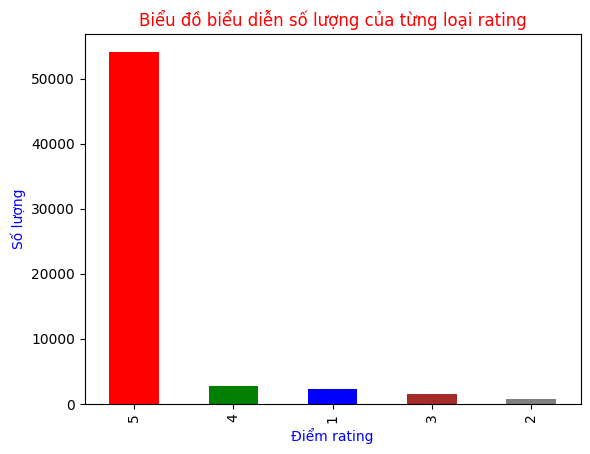

In [ ]:
df.rating_star.value_counts().plot(kind='bar', color = ['red', 'green', 'blue', 'brown', 'gray'])
plt.xlabel("Điểm rating", color = 'blue')
plt.ylabel("Số lượng", color = 'blue')
plt.title("Biểu đồ biểu diễn số lượng của từng loại rating", color = 'r')

In [ ]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 59.8 MB/s eta 0:00:00


In [ ]:
from pyvi import ViTokenizer

In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 43.1 MB/s eta 0:00:00


In [ ]:
text = []
for i in df['comment']:
    lines = gensim.utils.simple_preprocess(str(i))
    lines = ' '.join(lines)
    lines = ViTokenizer.tokenize(lines)
    text.append(lines)

In [ ]:
text

['chất_lượng sản_phẩm tốt_tính_năng nổi_bật tốt đúng với mô_tả tốt giao hàng nhanh chăm_sóc khách_hàng tận_tình sản_phẩm nhận đúng như mô_tả mới nhận về thấy cũng ok để thời_gian lâu xem thế_nào cảm_ơn shop chẳng hiểu sao khâu cskh cực chán chậm còn không trả_lời đã đánh_giá rồi nếu đánh_giá lại em cho ba sao',
 'hàng ok đóng_gói cẩn_thận nhìn chắc_chắn đang dùng thử xem ntn',
 'mua cho ba đặt màu đen giao màu xanh thôi cứ tạm cho sao máy mướt tốt so với giá này',
 'điện_thoại rất tốt pin trâu đủ dùng cho các tác vụ cơ_bản như xem phim đọc báo zalo nhắn_tin',
 'chất_lượng sản_phẩm tốt_tính_năng nổi_bật pin dùng ngày đóng_gói cẩn_thận có bọc túi giảm sốc gửi hàng nhanh sử_dụng ổn_định rất đáng tiền nên mua mình đã lấy cái em xinh như một bông hoa ngát hương lan_tỏa thiết_tha tháng_ngày dù xa tình vẫn đắm_say như bên nhau mãi vòng_tay nồng_nàn',
 'máy thiết_kế đẹp cấu_hình ổn cho các tác vụ hàng ngày pin trâu đóng_gói cẩn_thận tư_vấn nhiệt_tình đáng mua chưa ưng giao hàng của best ex mọi

In [ ]:
f1 = open('/content/vietnamese-stopwords.txt', 'r')
f2 = open('/content/vietnamese-stopwords-dash.txt', 'r')

In [ ]:
stopword1 = f1.read()
stopword2 = f2.read()

In [ ]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword1:
            words.append(word)
        elif word not in stopword2:
            words.append(word)
    return ' '.join(words)

In [ ]:
X = []
for i in text:
  lines = remove_stopwords(str(i))
  X.append(lines)

In [ ]:
df['clean_comment'] = X

In [ ]:
sentiment = []
for i in df['rating_star']:
  if i > 3:
    sentiment.append('positive')
  else:
    sentiment.append('negative')

In [ ]:
df['sentiment'] = sentiment

In [ ]:
df.head()

,comment,rating_star,clean_comment,sentiment
0,Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt...,3,chất_lượng sản_phẩm tốt_tính_năng nổi_bật mô_t...,negative
1,"Hàng Ok, đóng gói cẩn thận, nhìn chắc chắn đan...",5,hàng ok đóng_gói cẩn_thận chắc_chắn ntn,positive
2,Mua cho ba\nĐặt màu đen giao màu xanh\nThôi cứ...,4,mua màu đen giao màu xanh tạm máy mướt,positive
3,"Điện thoại rất tốt, pin trâu, đủ dùng cho các ...",5,điện_thoại pin trâu tác cơ_bản phim đọc báo za...,positive
4,Chất lượng sản phẩm:Tốt\nTính năng nổi bật:Pin...,5,chất_lượng sản_phẩm tốt_tính_năng nổi_bật pin ...,positive


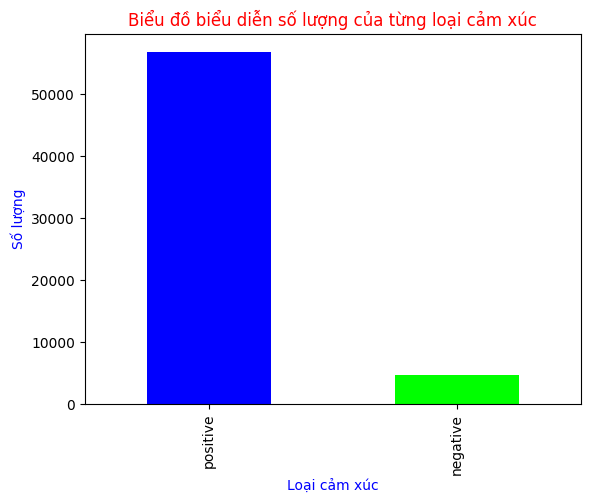

In [ ]:
df.sentiment.value_counts().plot(kind='bar',color=['blue','lime','red'])
plt.xlabel("Loại cảm xúc", color = 'blue')
plt.ylabel("Số lượng", color = 'blue')
plt.title("Biểu đồ biểu diễn số lượng của từng loại cảm xúc", color = 'r')
plt.show()

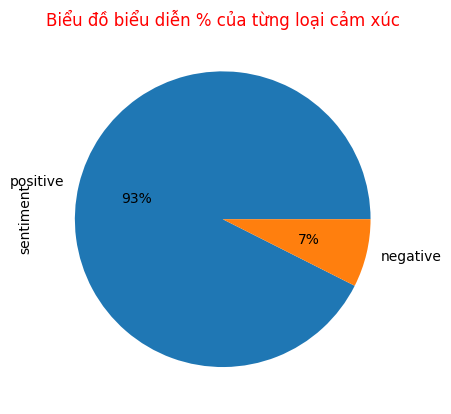

In [ ]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title("Biểu đồ biểu diễn % của từng loại cảm xúc", color = 'r')
plt.show()

In [ ]:
sentiment_positive = df.loc[df['sentiment'] == 'positive']
sentiment_negative = df.loc[df['sentiment'] == 'negative']

In [ ]:
df_positive = pd.DataFrame(sentiment_positive)
df_negative = pd.DataFrame(sentiment_negative)

In [ ]:
negative = df_negative['clean_comment']
positive = df_positive['clean_comment']

In [ ]:
from underthesea import pos_tag

In [ ]:
pos_negative = []
for i in negative:
  pos = pos_tag(str(i))
  pos_negative.append(pos)

In [ ]:
pos_negative_A = []
for i in range(len(pos_negative)):
  j = pos_negative[i]
  for k in range(len(j)):
    l = j[k]
    if l[1] == 'A':
      pos_negative_A.append(l)

In [ ]:
pos_negative_A_count = {}
for i in pos_negative_A:
  if i[0] not in pos_negative_A_count.keys():
    pos_negative_A_count[i[0]] = 1
  else:
    pos_negative_A_count[i[0]] += 1

In [ ]:
sorted(pos_negative_A_count, key = pos_negative_A_count.get, reverse=True)[:10]

['kém', 'đen', 'tạm', 'sai', 'đẹp', 'xanh', 'chậm', 'trắng', 'nóng', 'yếu']

In [ ]:
word = []
count = []
for i in pos_negative_A_count.keys():
  word.append(i)
for i in pos_negative_A_count.values():
  count.append(i)

In [ ]:
df1 = pd.DataFrame(np.array(word), columns = ['Word'])
df1['Count'] = count

In [ ]:
df1

,Word,Count
0,cskh,1
1,chậm,109
2,đẹp,158
3,vui,5
4,rẻ,68
...,...,...
314,tệ_nạn,1
315,bao_nhiêu,1
316,vội_vàng,1
317,sộp,1


In [ ]:
df1.to_excel('Negative.xlsx')

In [ ]:
df1['Word'] = df1['Word'].replace('đen', np.nan).replace('xanh', np.nan).replace('trắng', np.nan)

In [ ]:
df1 = df1[df1['Count'] > 50]

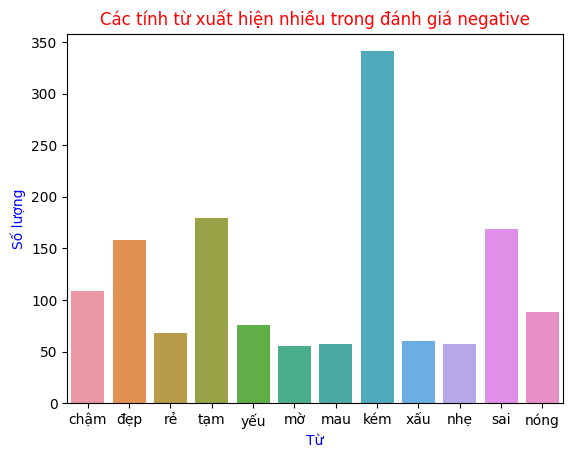

In [ ]:
sns.barplot(x = df1['Word'], y = df1['Count'])
plt.xlabel('Từ', color = 'blue')
plt.ylabel('Số lượng', color = 'blue')
plt.title('Các tính từ xuất hiện nhiều trong đánh giá negative', color = 'red')
plt.show()

In [ ]:
pos_positive = []
for i in positive:
  pos = pos_tag(str(i))
  pos_positive.append(pos)

In [ ]:
pos_positive_A = []
for i in range(len(pos_positive)):
  j = pos_positive[i]
  for k in range(len(j)):
    l = j[k]
    if l[1] == 'A':
      pos_positive_A.append(l)

In [ ]:
pos_positive_A_count = {}
for i in pos_positive_A:
  if i[0] not in pos_positive_A_count.keys():
    pos_positive_A_count[i[0]] = 1
  else:
    pos_positive_A_count[i[0]] += 1

In [ ]:
sorted(pos_positive_A_count, key = pos_positive_A_count.get, reverse=True)[:10]

['đẹp', 'ngon', 'rẻ', 'bền', 'mượt', 'tạm', 'hài_lòng', 'nhẹ', 'xịn', 'chậm']

In [ ]:
word = []
count = []
for i in pos_positive_A_count.keys():
  word.append(i)
for i in pos_positive_A_count.values():
  count.append(i)

In [ ]:
df2 = pd.DataFrame(np.array(word), columns = ['Word'])
df2['Count'] = count

In [ ]:
df2

,Word,Count
0,đen,324
1,xanh,284
2,tạm,890
3,đẹp,13474
4,đen đen,2
...,...,...
906,cảnh_giác,1
907,cod,1
908,to_tát,1
909,đth,1


In [ ]:
df2.to_excel('Positive.xlsx')

In [ ]:
df2 = df2[df2['Count'] > 500]

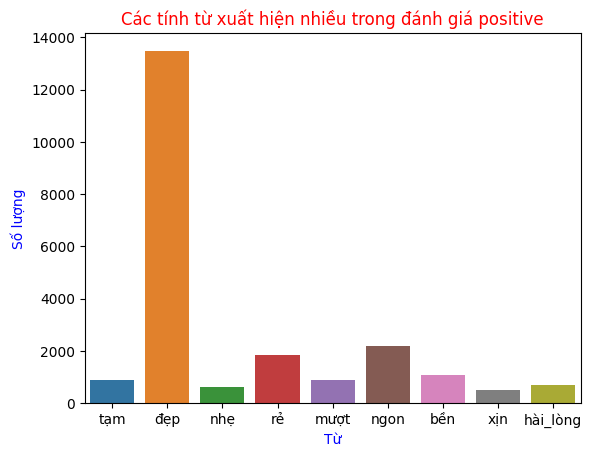

In [ ]:
sns.barplot(x = df2['Word'], y = df2['Count'])
plt.xlabel('Từ', color = 'blue')
plt.ylabel('Số lượng', color = 'blue')
plt.title('Các tính từ xuất hiện nhiều trong đánh giá positive', color = 'red')
plt.show()